# APPLIED MACHINE LEARNING Project

### Data Source:

Regression: https://www.kaggle.com/anthonypino/melbourne-housing-market

Classification: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Regression Problem

### Packages required:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import LinearSVC

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

### Read the datafile and describe the data

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Count and print Nulls

In [3]:
count = df.isnull().count()
nonnull = df.count()
nulls = df.isnull().sum()
print(nulls[nulls>0])

Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Convert object to category

In [5]:
cat_col = []
for i in range(len(df.select_dtypes(include =  ['O']).columns)):
    cat_col.append(df.select_dtypes(include =  ['O']).columns[i])
for i in cat_col:
    df[i] = df[i].astype('category')

### Create purchase category based on date of purchase

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df['DateYearPurchase'] = df['Date'].dt.dayofyear
df['Year'] = df['Date'].dt.year

spring = range(80,172)
summer = range(172,264)
fall = range(264,355)

season_list = []

for i in df['DateYearPurchase']:
    if i in spring:
        season = 'Spring'
    elif i in summer:
        season = 'Summer'
    elif i in fall:
        season = 'Fall'
    else:
        season = 'Winter'
    season_list.append(season)
    
df['Season'] = pd.Series(season_list)

df['Season'] = df['Season'].astype('category')
df['Year'] = df['Year'].astype('category')

df = df.drop(['DateYearPurchase','Date'],axis=1)

### Convert Postcode to category datatype

In [7]:
df['Postcode'] = df['Postcode'].astype('category')

### Comparing column Rooms vs Bedroom2

In [8]:
pd.DataFrame(df['Rooms'] - df['Bedroom2'] != 0).groupby(0).size()

0
False    25692
True      9165
dtype: int64

### Dropping Bedroom2 as it is similar to Rooms and is scraped from a diferrent source

In [9]:
df = df.drop(['Bedroom2'],axis=1)

### Dropping rows with null values from selected columns

In [10]:
df = df.drop(df[df['Distance'].isnull()\
   |df['Postcode'].isnull()\
   |df['CouncilArea'].isnull()\
   |df['Regionname'].isnull()\
   |df['Propertycount'].isnull()].index)

### Create house type based on Age

In [11]:
df['Age'] = 2019 - df['YearBuilt']

df['AgeType'] = np.where(df['Age'] >= 40, 'Old', 'Modern')

df['AgeType'] = df['AgeType'].astype('category')

In [12]:
df.AgeType.value_counts()

Modern    25591
Old        9263
Name: AgeType, dtype: int64

### Checking null percentage

In [13]:
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.833936
Method            0.000000
SellerG           0.000000
Distance          0.000000
Postcode          0.000000
Bathroom         23.592701
Car              25.032995
Landsize         33.875595
BuildingArea     60.572675
YearBuilt        55.382453
CouncilArea       0.000000
Lattitude        22.875423
Longtitude       22.875423
Regionname        0.000000
Propertycount     0.000000
Year              0.000000
Season            0.000000
Age              55.382453
AgeType           0.000000
dtype: float64

In [14]:
#Dataframe for reference
df_year = df['YearBuilt']

### Create house types based on size

In [15]:
df[['Rooms','BuildingArea']].describe()

,Rooms,BuildingArea
count,34854.000000,13742.00000
mean,3.031072,160.25640
std,0.969943,401.26706
min,1.000000,0.00000
25%,2.000000,102.00000
50%,3.000000,136.00000
75%,4.000000,188.00000
max,16.000000,44515.00000


In [16]:
df['SizeType'] = np.where(df['BuildingArea'] >= 100, 'Old', 'Modern')

conditions = [ df['BuildingArea'] >= 200, (df['BuildingArea'] < 200) & (df['BuildingArea']> 100), df['BuildingArea'] <= 100 ]
types = [ 'Big', 'Medium', 'Small']

df['SizeType'] = np.select(conditions, types, default=np.nan)

df['SizeType'] = df['SizeType'].astype('category')

### Create a housestructure dataframe for future

In [17]:
df_housestructure = df[['Rooms','BuildingArea','SizeType']]

### Dropping redundant and converted columns

In [18]:
df = df.drop(['BuildingArea','SizeType','YearBuilt','Age'],axis=1)

### Create a test data with the original null for prices

In [19]:
df_pure_test = df[df['Price'].isna()]

### Remove all nulls

In [20]:
df_clean = df.dropna()

### Overview of the data

In [21]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,17679.0,3.053849e+00,0.944396,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,17679.0,1.094974e+06,655981.504660,85000.00000,660000.00000,912500.0000,1.345000e+06,1.120000e+07
Distance,17679.0,1.115311e+01,6.643855,0.00000,6.50000,10.4000,1.390000e+01,4.810000e+01
Bathroom,17679.0,1.584422e+00,0.704733,0.00000,1.00000,1.0000,2.000000e+00,9.000000e+00
Car,17679.0,1.698739e+00,0.999023,0.00000,1.00000,2.0000,2.000000e+00,1.800000e+01
Landsize,17679.0,5.948663e+02,3786.375295,0.00000,222.50000,517.0000,6.640000e+02,4.330140e+05
Lattitude,17679.0,-3.780651e+01,0.089326,-38.19043,-37.85926,-37.7998,-3.774960e+01,-3.739946e+01
Longtitude,17679.0,1.449963e+02,0.116925,144.42379,144.92529,145.0027,1.450673e+02,1.455264e+02
Propertycount,17679.0,7.480045e+03,4398.062457,83.00000,4380.00000,6567.0000,1.033100e+04,2.165000e+04


### Viewing suspected outlier

In [22]:
df_clean[df_clean['Rooms'] == 12]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Season,AgeType
27150,Melton,213 Station Rd,12,h,710000.0,S,PRDNationwide,31.7,3337.0,5.0,3.0,960.0,Melton City Council,-37.6883,144.5776,Western Victoria,3600.0,2017,Fall,Old


In [23]:
df_clean[df_clean['Bathroom'] == 9]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Season,AgeType
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,10.4,3125.0,9.0,2.0,612.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0,2017,Fall,Modern


In [24]:
df_clean[df_clean['Car'] == 18]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Season,AgeType
25839,Croydon,26 Railway Cr,2,h,1105000.0,SP,iTRAK,23.0,3136.0,1.0,18.0,1250.0,Maroondah City Council,-37.79097,145.28695,Eastern Metropolitan,11925.0,2017,Fall,Modern


In [25]:
df_clean[df_clean['Landsize'] < 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Season,AgeType
17,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,2.5,3067.0,1.0,1.0,0.0,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019.0,2016,Summer,Modern
23,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.81100,145.00670,Northern Metropolitan,4019.0,2016,Fall,Modern
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,2016,Fall,Modern
29,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,2.5,3067.0,1.0,1.0,0.0,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019.0,2016,Spring,Modern
40,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,2.5,3067.0,2.0,2.0,0.0,Yarra City Council,-37.80930,144.99590,Northern Metropolitan,4019.0,2017,Winter,Modern
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2.5,3067.0,1.0,1.0,0.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,2016,Spring,Old
48,Abbotsford,5/20 Abbotsford St,1,u,426000.0,SP,Greg,2.5,3067.0,1.0,1.0,0.0,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019.0,2016,Summer,Modern
50,Abbotsford,116/56 Nicholson St,1,u,457000.0,S,Jellis,2.5,3067.0,1.0,1.0,0.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,2016,Summer,Modern
53,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,2.5,3067.0,3.0,1.0,0.0,Yarra City Council,-37.79940,144.99650,Northern Metropolitan,4019.0,2016,Fall,Modern
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2.5,3067.0,1.0,1.0,0.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,2016,Summer,Modern


### Removing the outliers

In [26]:
df_clean = df_clean[df_clean['Landsize'] > 10]

Landsizes cannot be so small and there seems to be some error. As, such values account for less number of data, they can be removed

### Sampling and segregating data

In [27]:
df_clean = pd.DataFrame.sample(df_clean, 5000, random_state=1000)
df_target = df_clean.Price
df_target = pd.DataFrame(df_target)
df_data = df_clean.drop(['Price'],axis=1)
df_num = df_data.select_dtypes(include=['int64','float64'])
df_cat = df_data.select_dtypes(include='category')

### Final null check:

In [28]:
df_clean.isnull().sum()/len(df_clean)*100

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Distance         0.0
Postcode         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
Year             0.0
Season           0.0
AgeType          0.0
dtype: float64

In [29]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,3.189200,0.882020,1.00000,3.000000,3.000000,4.000000,12.00000
Distance,5000.0,11.714800,6.664902,0.70000,7.200000,11.000000,14.500000,47.40000
Bathroom,5000.0,1.634400,0.715569,0.00000,1.000000,2.000000,2.000000,9.00000
Car,5000.0,1.776400,1.055190,0.00000,1.000000,2.000000,2.000000,18.00000
Landsize,5000.0,657.184000,2725.078209,14.00000,304.000000,552.000000,678.000000,146699.00000
Lattitude,5000.0,-37.803080,0.092237,-38.17095,-37.859200,-37.795535,-37.743093,-37.41953
Longtitude,5000.0,144.993136,0.124814,144.43940,144.914885,145.001845,145.072900,145.47282
Propertycount,5000.0,7405.466600,4361.927007,249.00000,4242.000000,6482.000000,10331.000000,21650.00000


### Graphs

Price Distibution:

C:\Users\somen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


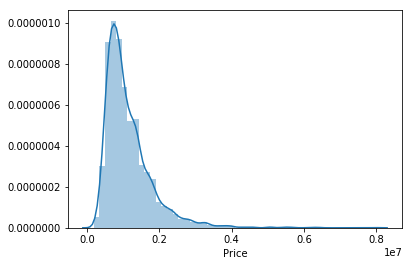

In [30]:
sns.distplot(df_clean['Price'])

### Log transformation as the data for Price is skewed

In [31]:
main_price = df_clean.Price
df_target['lnPrice'] = np.log(df_target.Price)
df_target = df_target.drop(['Price'], axis=1)

Comparision Graphs:

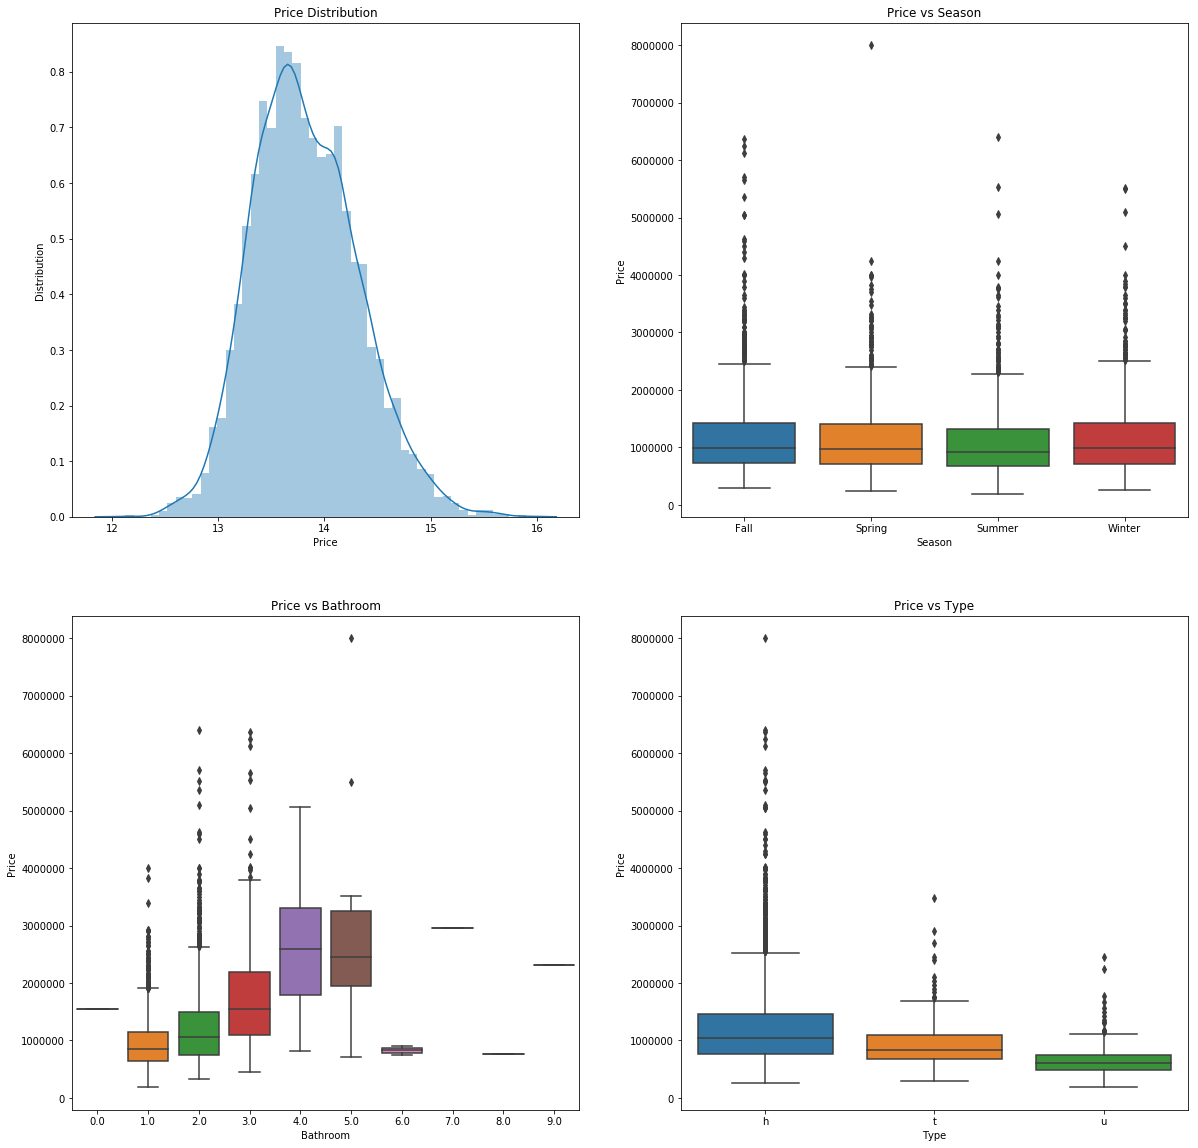

In [32]:
fig,axis = plt.subplots(2,2,figsize=[20,20])
sns.distplot( df_target['lnPrice'],ax=axis[0,0] )
axis[0,0].set_xlabel('Price')
axis[0,0].set_ylabel('Distribution')
axis[0,0].set_title('Price Distribution')

sns.boxplot(x='Season',y='Price',data=df_clean ,ax=axis[0,1])
axis[0,1].set_xlabel('Season')
axis[0,1].set_ylabel('Price')
axis[0,1].set_title('Price vs Season')

sns.boxplot(x='Bathroom',y='Price',data=df_clean ,ax=axis[1,0])
axis[1,0].set_xlabel('Bathroom')
axis[1,0].set_ylabel('Price')
axis[1,0].set_title('Price vs Bathroom')

sns.boxplot( x='Type',y='Price',data=df_clean ,ax=axis[1,1])
axis[1,1].set_xlabel('Type')
axis[1,1].set_ylabel('Price')
axis[1,1].set_title('Price vs Type')
plt.show()

Correlation Matrix:

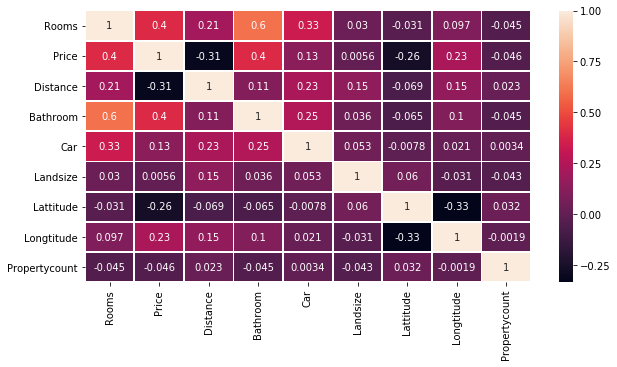

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(),linewidth = 1,annot= True)

After Careful analysis of the features and their correlation matrices,
we can see that all the features in the data are not correlated.

If there was highly correlated data, it would have provided same information and would not be helpful in developing machine learning models.

### Removing non-important categorical columns

In [34]:
df_cat = df_cat.drop(['Suburb','Address','SellerG','Method','Postcode','CouncilArea','Regionname'],axis=1)

### Hot encoding the data

In [35]:
encoded_data = pd.get_dummies(df_cat[df_cat.columns])

### Creating the final dataset for the model

In [36]:
df_data = pd.concat([df_num, encoded_data], axis = 1)

### Splitting the data in test and train

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_target, test_size = .30, random_state=1000)

### Polynomial Featuring

Generate polynomial and interaction features

In [38]:
pol = PolynomialFeatures(2)
X_pol_num = pol.fit_transform(df_data[df_num.columns])
X_pol = np.concatenate((X_pol_num, encoded_data.values), axis=1)

X_pol_train, X_pol_test, y_pol_train,y_pol_test = train_test_split(X_pol, df_target, test_size = .30, random_state=1000)

### Scaling

Normalizing the range of the data

Standardscaler:
It assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation.
 After applying the scaler all features will be of same scale .
Minmaxscaler shrinks the data within the range of -1 to 1(if there are negative values)

In [39]:
scale = StandardScaler()
scale.fit(X_train)
X_train_sl = scale.transform(X_train)
X_test_sl = scale.transform(X_test)
X_train_sl = pd.DataFrame(X_train_sl, columns=X_train.columns.values)
X_test_sl = pd.DataFrame(X_test_sl, columns=X_test.columns.values)

Scaling polynomial dataset

In [40]:
scale = StandardScaler()
scale.fit(X_pol_train)
X_pol_train = scale.transform(X_pol_train)
X_pol_test = scale.transform(X_pol_test)

### Creating a loop to run all the models

In [41]:
input_df = {
    "default_df": {"X_train": X_train_sl, "X_test": X_test_sl},
    "poly_df": {"X_train": X_pol_train, "X_test": X_pol_test}
}

mods = {
        "SVR": SVR(),
        "KNN-Reg": KNeighborsRegressor(),
        "Linear-Reg": LinearRegression(),
        "Lasso-Reg": linear_model.Lasso(),
        "Ridge-Reg": linear_model.Ridge(),
        }

par = {
        "SVR": {'C': [0.01, 0.1, 1, 10],'gamma': [0.01, 0.1, 1, 10],'epsilon': [0.01, 0.1, 1],'kernel': ['rbf']},
        "KNN-Reg": {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
        "Linear-Reg": {},
        "Lasso-Reg": {"alpha": [0.01, 0.1, 1, 10]},
        "Ridge-Reg": {"alpha": [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500]},
        "Linear SVM": {},
        }

best_est = {}

for datatype, data in input_df.items():
    X_train = data["X_train"]
    X_test = data["X_test"]
    
    for model_name, model in mods.items():
        grid_search = GridSearchCV(model, par[model_name], cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        print("Datatype:", datatype)
        print("Model:", model_name)
        print("Parameter(optimum): {}".format(grid_search.best_params_))
        print("Cross-validation score: {:.2f}".format(grid_search.best_score_))
        
        best_est.setdefault(model_name, {})
        best_est[model_name].setdefault("estimators", {})
        best_est[model_name]["estimators"][datatype] = grid_search.best_estimator_
        print("\n\n")

C:\Users\somen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Datatype: default_df
Model: SVR
Parameter(optimum): {'C': 10, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation score: 0.77



Datatype: default_df
Model: KNN-Reg
Parameter(optimum): {'n_neighbors': 6}
Cross-validation score: 0.61



Datatype: default_df
Model: Linear-Reg
Parameter(optimum): {}
Cross-validation score: 0.65



Datatype: default_df
Model: Lasso-Reg
Parameter(optimum): {'alpha': 0.01}
Cross-validation score: 0.64



Datatype: default_df
Model: Ridge-Reg
Parameter(optimum): {'alpha': 20}
Cross-validation score: 0.65





C:\Users\somen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Datatype: poly_df
Model: SVR
Parameter(optimum): {'C': 1, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation score: 0.78



Datatype: poly_df
Model: KNN-Reg
Parameter(optimum): {'n_neighbors': 10}
Cross-validation score: 0.65



Datatype: poly_df
Model: Linear-Reg
Parameter(optimum): {}
Cross-validation score: 0.01





C:\Users\somen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Datatype: poly_df
Model: Lasso-Reg
Parameter(optimum): {'alpha': 0.01}
Cross-validation score: 0.65



Datatype: poly_df
Model: Ridge-Reg
Parameter(optimum): {'alpha': 100}
Cross-validation score: 0.67





### Viewing the best estimators for the dataset

In [42]:
best_est

{'SVR': {'estimators': {'default_df': SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
   'poly_df': SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}},
 'KNN-Reg': {'estimators': {'default_df': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=6, p=2,
             weights='uniform'),
   'poly_df': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=10, p=2,
             weights='uniform')}},
 'Linear-Reg': {'estimators': {'default_df': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   'poly_df': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)}},
 'Lasso-Reg': {'estimators': {'default_

In [43]:
model_perf = pd.DataFrame({"model_name": [], "R2-Score": []})

### Selecting the best model for analysis

In [44]:
chosen_est = best_est["Lasso-Reg"]["estimators"]["poly_df"]
X_test = input_df["poly_df"]["X_test"]

log_pred = chosen_est.predict(X_test)
price_pred = np.exp(log_pred)
price_test = np.exp(y_test)

### Explained Variance Score

In [45]:
score = explained_variance_score(price_test, price_pred)
print("Explained Variance Score:", round(score*100, 2), "%")

Explained Variance Score: 54.77 %


### Mean Absolute error

In [46]:
mae = mean_absolute_error(price_test, price_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 279197.9157638853


### Median Absolute error

In [47]:
mdae = median_absolute_error(price_test, price_pred)
print("Median Absolute Error:", mdae)

Median Absolute Error: 174600.67670650315


### Mean Squared error

In [48]:
mse = mean_squared_error(price_test, price_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 211986794819.20715


### Mean Squared Log Errors

In [49]:
msle = mean_squared_log_error(price_test, price_pred)
print("Mean Squared Log Errors:", msle)

Mean Squared Log Errors: 0.0944050894874527


### R^2 Score

In [50]:
r2 = r2_score(price_test, price_pred)
print("R2 Score:", r2)

R2 Score: 0.5266865387426957


In [51]:
model_perf = model_perf.append({"model_name": "Lasso-Reg", "R2-Score": r2}, ignore_index=True)

### Selecting the second best model for analysis

In [52]:
chosen_est = best_est["SVR"]["estimators"]["default_df"]
X_test = input_df["default_df"]["X_test"]

log_pred = chosen_est.predict(X_test)
price_pred = np.exp(log_pred)
price_test = np.exp(y_test)

### Explained Variance Score

In [53]:
score = explained_variance_score(price_test, price_pred)
print("Explained Variance Score:", round(score*100, 2), "%")

Explained Variance Score: 69.8 %


### Mean Absolute error

In [54]:
mae = mean_absolute_error(price_test, price_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 219464.0916219988


### Median Absolute error

In [55]:
mdae = median_absolute_error(price_test, price_pred)
print("Median Absolute Error:", mdae)

Median Absolute Error: 127686.12661102507


### Mean Squared error

In [56]:
mse = mean_squared_error(price_test, price_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 139883004063.9081


### Mean Squared Log Errors

In [57]:
msle = mean_squared_log_error(price_test, price_pred)
print("Mean Squared Log Errors:", msle)

Mean Squared Log Errors: 0.05623548348014024


### R^2 Score

In [58]:
r2 = r2_score(price_test, price_pred)
print("R2 Score:", r2)

R2 Score: 0.6876762588866735


In [59]:
model_perf = model_perf.append({"model_name": "SVR", "R2-Score": r2}, ignore_index=True)

### Model Performance

In [60]:
model_perf

,model_name,R2-Score
0,Lasso-Reg,0.526687
1,SVR,0.687676


Best model for Regression is Lasso Regression

# Classification Problem

### Packages required:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score

### Read the datafile and describe the data

In [62]:
weatherAUS = pd.read_csv("weatherAUS.csv")
print(weatherAUS.shape)

(142193, 24)


In [63]:
weatherAUS.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

### Dropping the columns with 50% data

In [64]:
weatherAUS_new = weatherAUS.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)

In [65]:
weatherAUS_new.shape

(142193, 18)

### Removing null values

In [66]:
weatherAUS_new = weatherAUS_new.dropna(how='any')

In [67]:
weatherAUS_new.shape

(112925, 18)

### Removing the outliers by calculating the Zscore

In [68]:
z=np.abs(stats.zscore(weatherAUS_new._get_numeric_data()))
threshold = 3
weatherAUS_new= weatherAUS_new[(z < 3).all(axis=1)]
weatherAUS_new.shape


(106447, 18)

### Handling the categorical data.


Replacing Yes/No to 1/0

In [69]:
weatherAUS_new['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weatherAUS_new['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [70]:
weatherAUS_new.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2,0


In [71]:
dummy_col = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
weatherAUS_new = pd.get_dummies(weatherAUS_new, columns=dummy_col)
weatherAUS_new.iloc[4:9]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


### Standardizing the data

In [72]:
minmax = preprocessing.MinMaxScaler()
minmax.fit(weatherAUS_new)
weatherAUS_new = pd.DataFrame(minmax.transform(weatherAUS_new), index=weatherAUS_new.index, columns=weatherAUS_new.columns)
weatherAUS_new.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Graphs

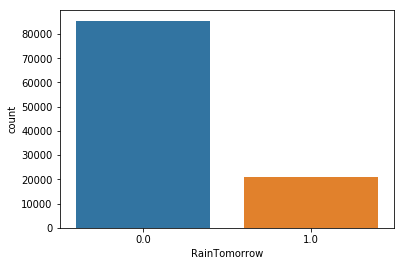

In [73]:
ax = sns.countplot(x="RainTomorrow", data=weatherAUS_new)

C:\Users\somen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


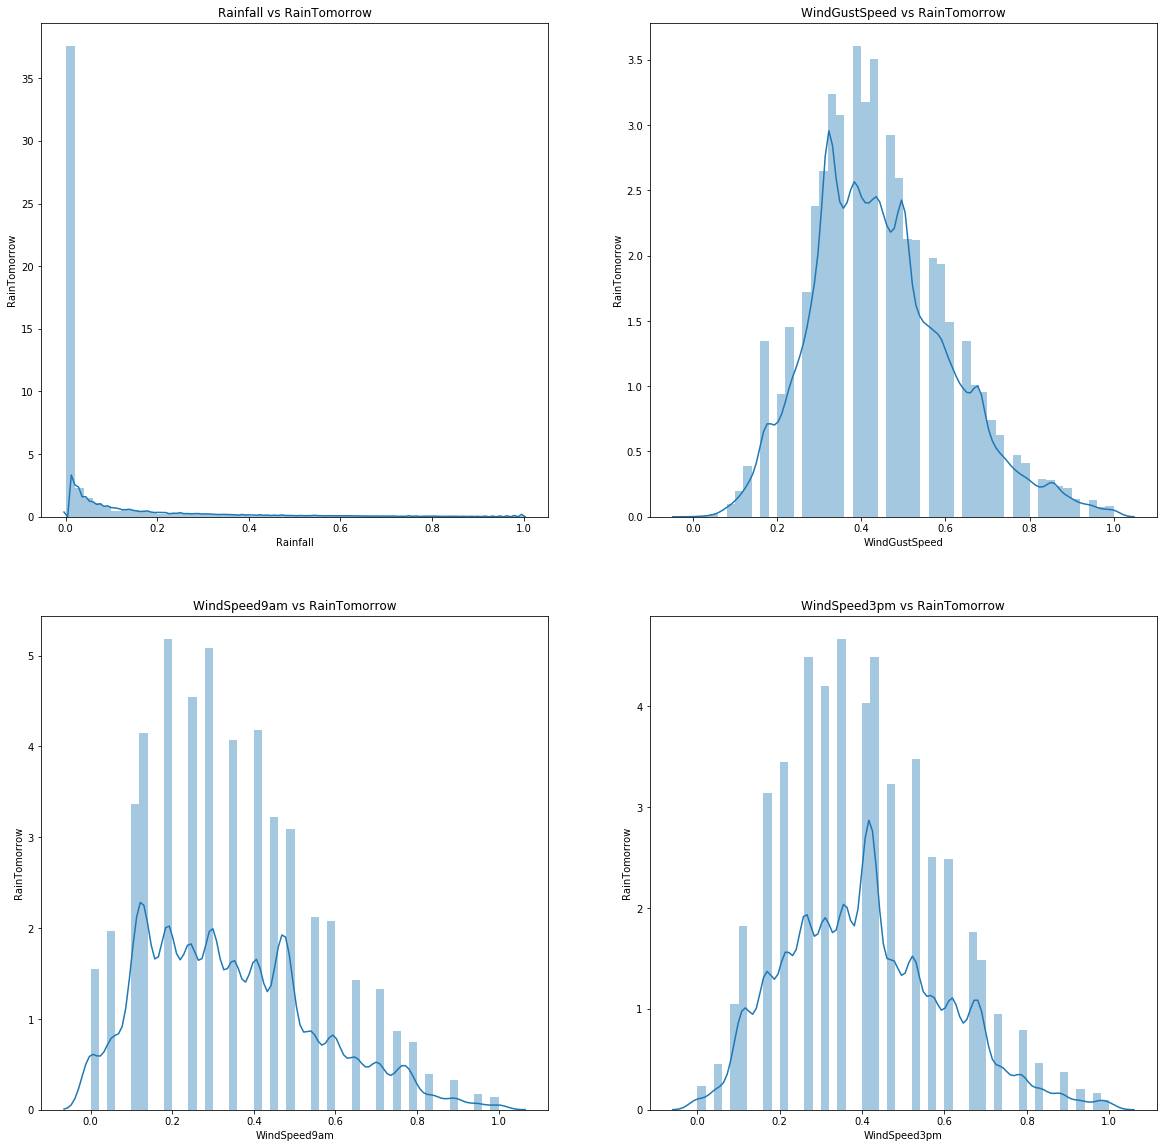

In [74]:
fig,axis = plt.subplots(2,2,figsize=[20,20])
sns.distplot(weatherAUS_new['Rainfall'],ax=axis[0,0] )
axis[0,0].set_xlabel('Rainfall')
axis[0,0].set_ylabel('RainTomorrow')
axis[0,0].set_title('Rainfall vs RainTomorrow')

sns.distplot(weatherAUS_new['WindGustSpeed'],ax=axis[0,1] )
axis[0,1].set_xlabel('WindGustSpeed')
axis[0,1].set_ylabel('RainTomorrow')
axis[0,1].set_title('WindGustSpeed vs RainTomorrow')

sns.distplot(weatherAUS_new['WindSpeed9am'],ax=axis[1,0] )
axis[1,0].set_xlabel('WindSpeed9am')
axis[1,0].set_ylabel('RainTomorrow')
axis[1,0].set_title('WindSpeed9am vs RainTomorrow')

sns.distplot(weatherAUS_new['WindSpeed3pm'],ax=axis[1,1] )
axis[1,1].set_xlabel('WindSpeed3pm')
axis[1,1].set_ylabel('RainTomorrow')
axis[1,1].set_title('WindSpeed3pm vs RainTomorrow')
plt.show()

### Correlation

In [75]:
correlation = weatherAUS_new.corr()

### Preparing the dataset for models

In [76]:
weatherAUS_final = pd.DataFrame.sample(weatherAUS_new, 10000, random_state=1000)

In [77]:
df_data = weatherAUS_final.drop(["RainTomorrow","RISK_MM"], axis=1)
df_target = weatherAUS_final["RainTomorrow"]

### Splitting training and test dataset

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_target, test_size = .30, random_state=1000)

### Scaling

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sl = scaler.transform(X_train)
X_test_sl = scaler.transform(X_test)
X_train_sl = pd.DataFrame(X_train_sl, columns=X_train.columns.values)
X_test_sl = pd.DataFrame(X_test_sl, columns=X_test.columns.values)

### Creating a loop to run all the models

In [80]:
input_df = {
            "scaled_df": {"X_train": X_train_sl, "X_test": X_test_sl},
            "default_df": {"X_train": X_train, "X_test": X_test},
            }

mods = {
        "KNN-Classifier": KNeighborsClassifier(),
        "Logistic Reg": LogisticRegression(),
        "LinearSVC": LinearSVC(),
        "SVM Kernelized": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        }

par = {
        "KNN-Classifier": {'n_neighbors': [3, 5, 8, 10, 15, 20]},
        "Logistic Reg": {'C': [0.01, 0.1, 1, 10]},
        "LinearSVC": {'C': [0.01, 0.1, 1, 10]},
        "SVM Kernelized": {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']},
        "Decision Tree": {},
        }

best_est = {}

for datatype, data in input_df.items():
    X_tr = data["X_train"]
    
    for model_name, model in mods.items():
        grid_search = GridSearchCV(model, par[model_name], cv=3, n_jobs=-1)
        grid_search.fit(X_tr, y_train)

        print("Datatype:", datatype)
        print("Model:", model_name)
        print("Parameter(Optimum): {}".format(grid_search.best_params_))
        print("Cross-validation score: {:.2f}".format(grid_search.best_score_))
        
        best_est.setdefault(model_name, {})
        best_est[model_name].setdefault("estimators", {})
        best_est[model_name]["estimators"][datatype] = grid_search.best_estimator_
        
        print("\n\n")

Datatype: scaled_df
Model: KNN-Classifier
Parameter(Optimum): {'n_neighbors': 20}
Cross-validation score: 0.81



Datatype: scaled_df
Model: Logistic Reg
Parameter(Optimum): {'C': 1}
Cross-validation score: 0.85



Datatype: scaled_df
Model: LinearSVC
Parameter(Optimum): {'C': 0.01}
Cross-validation score: 0.85



Datatype: scaled_df
Model: SVM Kernelized
Parameter(Optimum): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation score: 0.85



Datatype: scaled_df
Model: Decision Tree
Parameter(Optimum): {}
Cross-validation score: 0.79



Datatype: default_df
Model: KNN-Classifier
Parameter(Optimum): {'n_neighbors': 15}
Cross-validation score: 0.81



Datatype: default_df
Model: Logistic Reg
Parameter(Optimum): {'C': 10}
Cross-validation score: 0.85



Datatype: default_df
Model: LinearSVC
Parameter(Optimum): {'C': 1}
Cross-validation score: 0.85



Datatype: default_df
Model: SVM Kernelized
Parameter(Optimum): {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation score: 0.85





### Viewing the best estimators for the dataset

In [81]:
best_est

{'KNN-Classifier': {'estimators': {'scaled_df': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=1, n_neighbors=20, p=2,
              weights='uniform'),
   'default_df': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=1, n_neighbors=15, p=2,
              weights='uniform')}},
 'Logistic Reg': {'estimators': {'scaled_df': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False),
   'default_df': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
             verbose=0

In [82]:
model_perf = pd.DataFrame({"model_name": [], "F1-Score": []})

### Selecting the best model for analysis

In [83]:
chosen_est = best_est["Logistic Reg"]["estimators"]["default_df"]
X_test = input_df["default_df"]["X_test"]

preds = chosen_est.predict(X_test)

### Accuracy

In [84]:
acc = accuracy_score(y_test, preds)
print("Accuracy: ", round(acc*100, 2), "%")

Accuracy:  85.77 %


### F1-Score

In [85]:
f1 = f1_score(y_test, preds)
print("F1-Score: ", round(f1*100, 2), "%")

F1-Score:  54.04 %


In [86]:
model_perf = model_perf.append({"model_name": "Logistic Reg", "F1-Score": f1}, ignore_index=True)

### Confusion Matrix

[[2322   99]
 [ 328  251]]


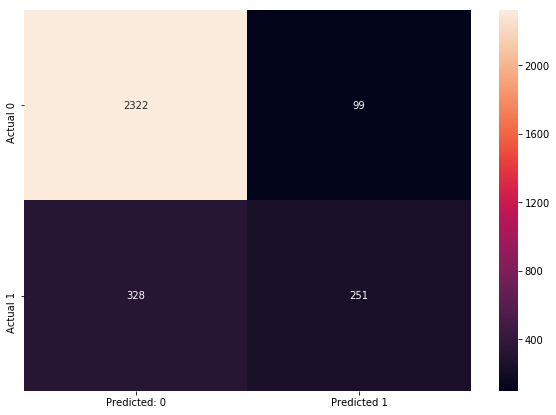

In [87]:
conf_m = confusion_matrix(y_test, preds)
print(conf_m)

conf_df = pd.DataFrame(conf_m, index = ["Actual 0", "Actual 1"], columns = ["Predicted: 0", "Predicted 1"])
plt.figure(figsize = (10,7))
sns.heatmap(conf_df, annot=True, fmt='g')

### Precision Recall

Text(0.5,1,'Average Precision =42.02%')

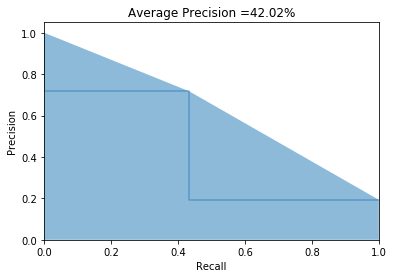

In [88]:
precision, recall, threshold = precision_recall_curve(y_test, preds)
average_precision = average_precision_score(y_test, preds)

plt.step(recall, precision, alpha=0.5,where='post')

plt.fill_between(recall, precision, alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average Precision =' + str(round(average_precision*100, 2)) + "%")

### ROC Curve

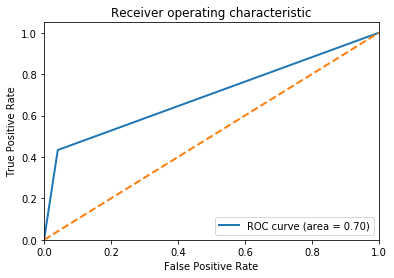

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure()

class_num = 2
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Selecting the second best model for analysis

In [90]:
chosen_est = best_est["SVM Kernelized"]["estimators"]["scaled_df"]
X_test = input_df["scaled_df"]["X_test"]

preds = chosen_est.predict(X_test)

### Accuracy

In [91]:
acc = accuracy_score(y_test, preds)
print("Accuracy: ", round(acc*100, 2), "%")

Accuracy:  85.6 %


### F1-Score

In [92]:
f1 = f1_score(y_test, preds)
print("F1-Score: ", round(f1*100, 2), "%")

F1-Score:  49.41 %


In [93]:
model_perf = model_perf.append({"model_name": "SVM Kernelized", "F1-Score": f1}, ignore_index=True)

### Model Performance

In [94]:
model_perf

,model_name,F1-Score
0,Logistic Reg,0.540366
1,SVM Kernelized,0.494145


### Confusion Matrix

[[2357   64]
 [ 368  211]]


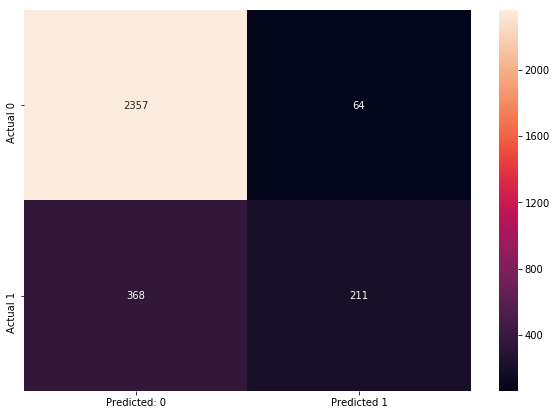

In [95]:
conf_m = confusion_matrix(y_test, preds)
print(conf_m)

conf_df = pd.DataFrame(conf_m, index = ["Actual 0", "Actual 1"], columns = ["Predicted: 0", "Predicted 1"])
plt.figure(figsize = (10,7))
sns.heatmap(conf_df, annot=True, fmt='g')

### Precision Recall

Text(0.5,1,'Average Precision =40.23%')

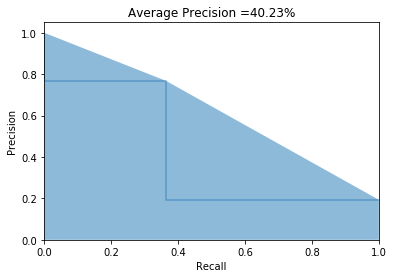

In [96]:
precision, recall, threshold = precision_recall_curve(y_test, preds)
average_precision = average_precision_score(y_test, preds)

plt.step(recall, precision, alpha=0.5,where='post')

plt.fill_between(recall, precision, alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average Precision =' + str(round(average_precision*100, 2)) + "%")

### ROC Curve

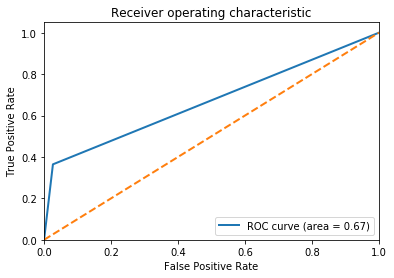

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure()

class_num = 2
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Best model for Classification is Logistic Regression